In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data

df = pd.read_csv('../data/final/combined.csv')
# df = pd.read_csv('../data/final/2019-school-stats.csv')

In [5]:
# df.sample(5)

# df.describe()

# # Get the number of rows and columns
# df.shape

# # Get the column names
# df.columns

# sns.displot(df['G'], kde=True)

mapa = {'Champions': 8, '2ND' : 7, 'F4' : 6, 'E8' : 5, 'S16' : 4, 'R32' : 3, 'R64' : 2, 'R68' : 1}
df['POSTSEASON_value'] = df['POSTSEASON'].map(mapa)

df['POSTSEASON_value'].value_counts()

2.0    288
3.0    144
4.0     72
5.0     36
1.0     36
6.0     18
8.0      9
7.0      9
Name: POSTSEASON_value, dtype: int64

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

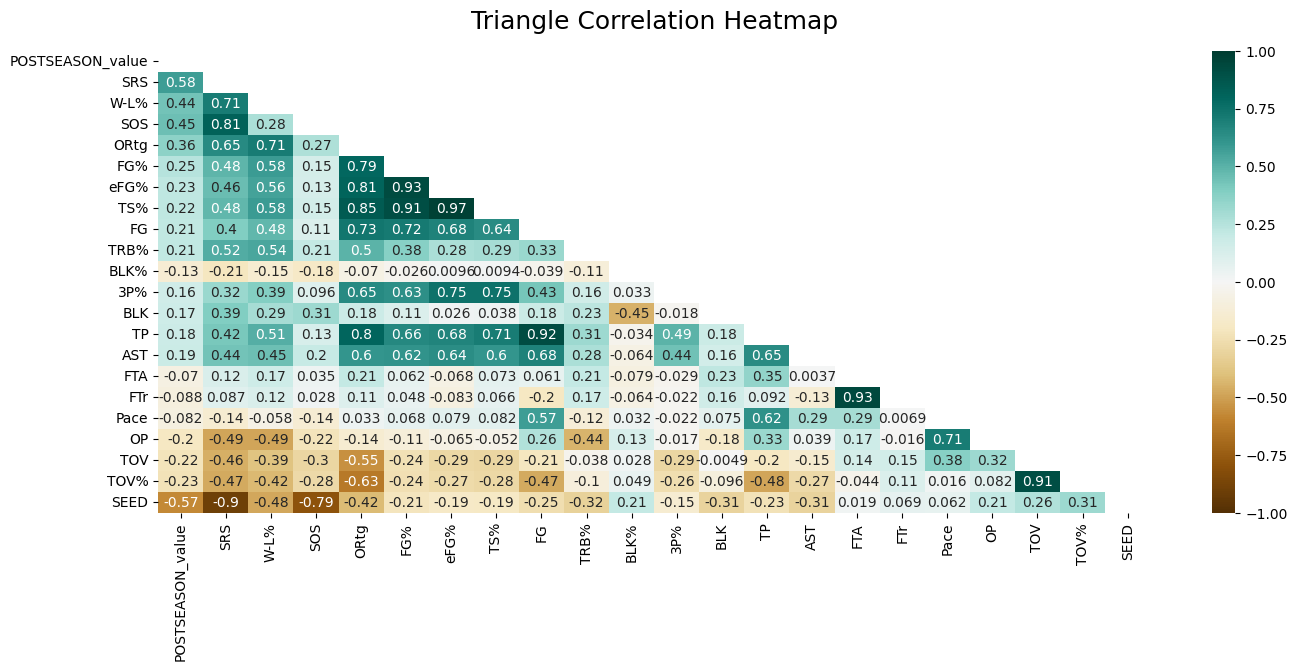

In [6]:
temp = df[['POSTSEASON_value', 'SRS', 'W-L%', 'SOS', 'ORtg', 'FG%', 'eFG%', 'TS%', 'FG', 'TRB%', 'BLK%', '3P%', 'BLK', 'TP', 'AST', 'FTA', 'FTr', 'Pace', 'OP', 'TOV', 'TOV%', 'SEED']]

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(temp.corr(), dtype=bool))
heatmap = sns.heatmap(temp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

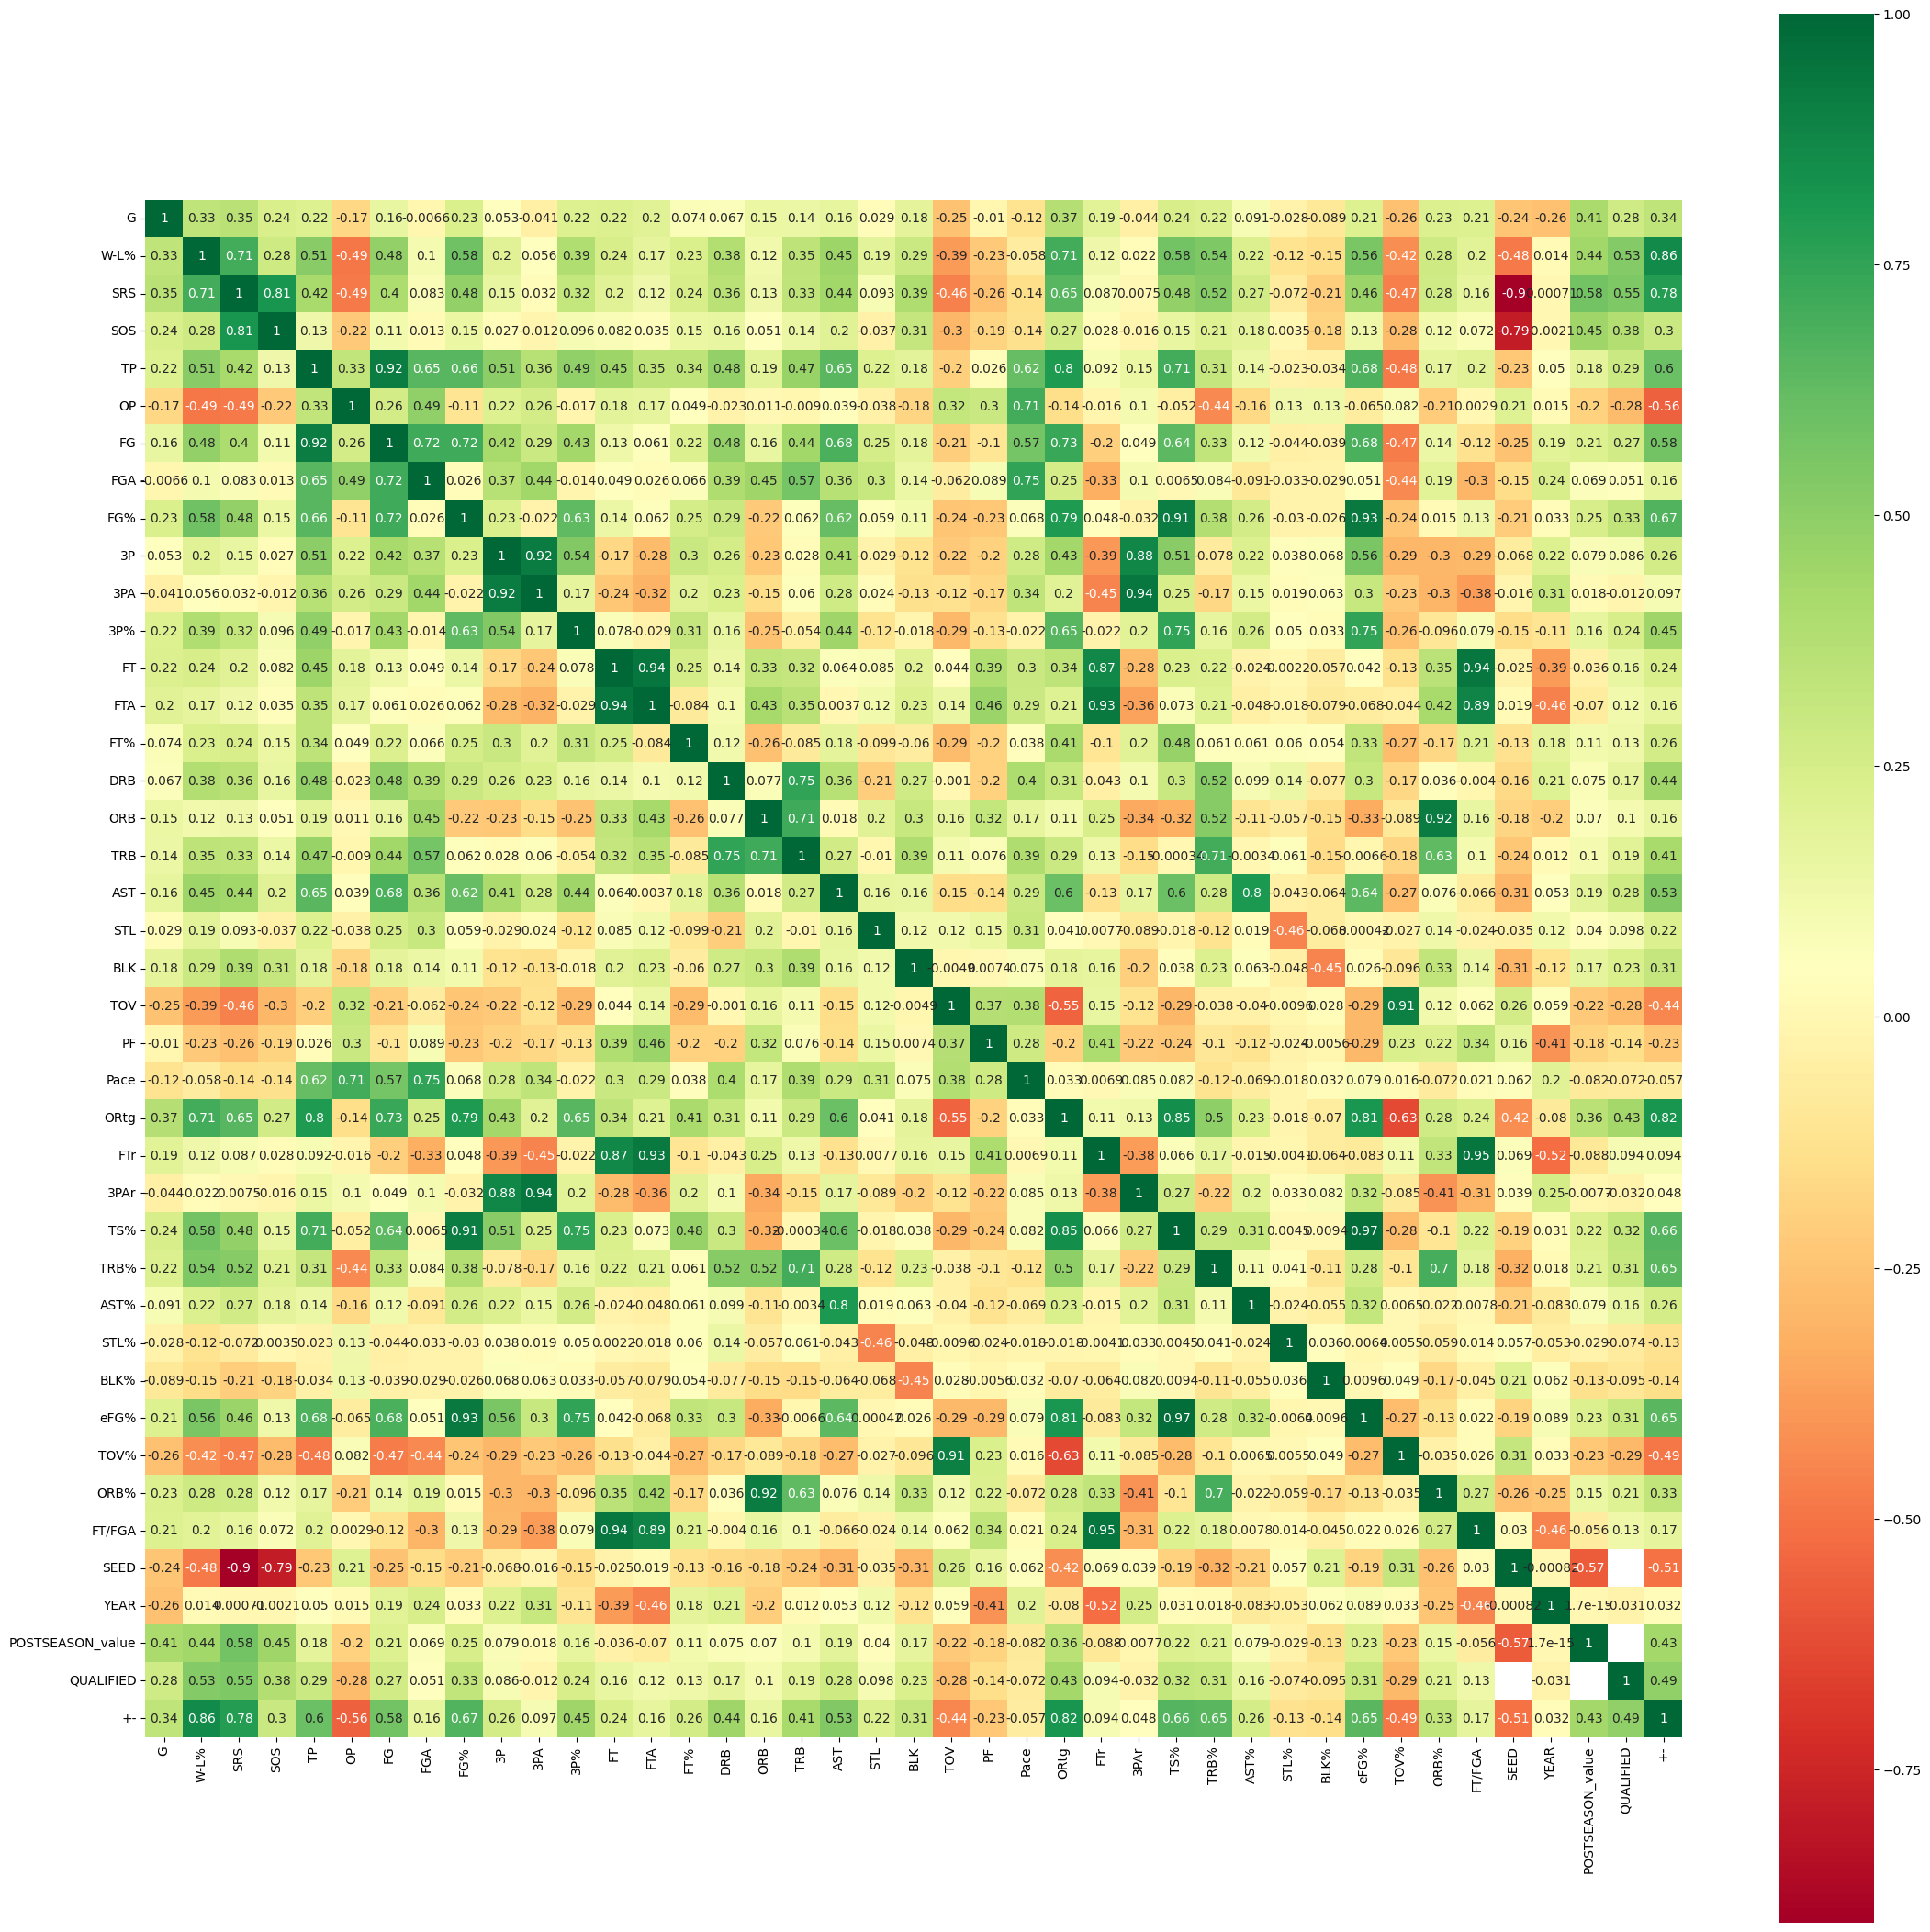

In [7]:
plt.figure(figsize=(27, 27))
drop = ['School','Overall.W', 'Overall.L', 'Conf.W', 'Conf.L', 'Home.W', 'Home.L', 'Away.W', 'Away.L', 'MP', 'POSTSEASON', 'REGION']
df.drop(drop, axis=1, inplace=True)
df['QUALIFIED'] = ~pd.isna(df['SEED'])
df['+-'] = df['TP'] - df['OP']

p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', square=True)

In [15]:
corr_mat = df.corr()
corr_mat = np.abs(corr_mat['POSTSEASON_value'])
corr_mat.sort_values(ascending=False)[:30]

POSTSEASON_value    1.000000
SRS                 0.577202
SEED                0.574610
SOS                 0.446261
W-L%                0.435780
+-                  0.427799
G                   0.406238
ORtg                0.360340
FG%                 0.245353
TOV%                0.228513
eFG%                0.225099
TS%                 0.220873
TOV                 0.219715
FG                  0.214434
TRB%                0.211555
OP                  0.195672
AST                 0.186481
PF                  0.184627
TP                  0.177557
BLK                 0.171668
3P%                 0.163038
ORB%                0.152473
BLK%                0.134538
FT%                 0.112454
TRB                 0.101141
FTr                 0.087760
Pace                0.081792
AST%                0.079175
3P                  0.078591
DRB                 0.074851
Name: POSTSEASON_value, dtype: float64

<Axes: xlabel='+-', ylabel='SRS'>

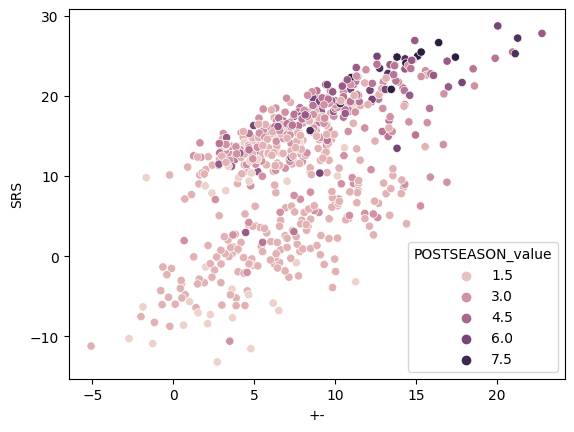

In [16]:
sns.scatterplot(y=df['SRS'], x=df['+-'], hue=df['POSTSEASON_value'])